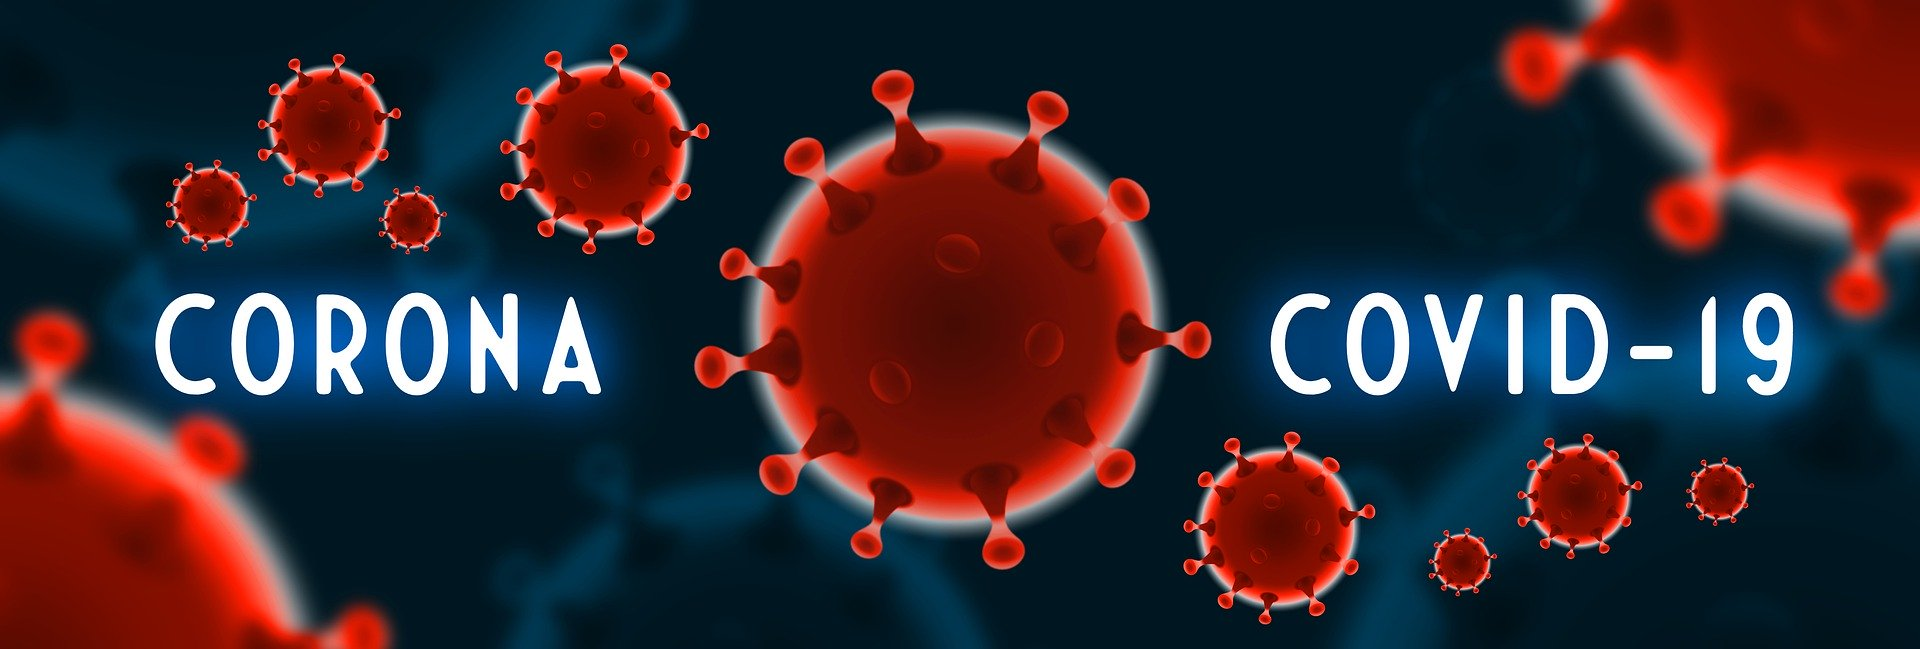

Note: Datasets are up to 04/26/22

# Covid Introduction

Add some text here about importance of this

## Data Collection/Curation

In [197]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, re, datetime

The John's Hopkins curated dataset can be found [here](https://github.com/CSSEGISandData/COVID-19). For our analysis, we'll be using the time series csv file for confirmed cases and deaths within the United States.

In [198]:
confirmed_US = pd.read_csv("datasets/time_series_covid19_confirmed_US.csv")
deaths_US = pd.read_csv("datasets/time_series_covid19_deaths_US.csv")
confirmed_US['Admin2'] = confirmed_US['Admin2'].astype(str)
deaths_US['Admin2'] = deaths_US['Admin2'].astype(str)


confirmed_US

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15752,15752,15771,15755,15757,15759,15762,15762,15762,15814
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,55547,55547,55579,55564,55571,55576,55591,55591,55591,55607
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5658,5658,5659,5658,5658,5659,5660,5660,5660,5661
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6428,6428,6428,6428,6428,6428,6430,6430,6430,6435
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,14959,14959,14963,14961,14963,14967,14967,14967,14967,14967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,9945,9945,9945,9975,9975,9975,9975,9975,9975,9975
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,5624,5624,5624,5625,5625,5625,5625,5625,5625,5625
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357


Next we'll check for null values

In [199]:
confirmed_US[confirmed_US.isna().any(axis=1)]
deaths_US[deaths_US.isna().any(axis=1)]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
1269,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,...,16,16,16,16,16,16,16,16,16,17
1306,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,...,5,5,5,5,5,5,5,5,5,5
1338,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,...,177,177,177,177,177,177,177,177,177,177
1593,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,...,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290
2956,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,...,247,247,247,247,247,247,247,247,247,247
2961,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,167,167,167,167,167,167,167,167,167,167
2980,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,81,81,81,81,81,81,81,81,81,81
2981,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,648,648,648,648,648,649,649,649,649,649
2984,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,106,106,106,106,106,106,106,106,106,106
2992,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,...,453,453,453,453,453,453,453,453,453,453


We see that for all of these entries the FIPS-Code is NaN, here we will drop these rows as locations without FIPS codes are not counties or county equivalent and would not be matched to later county informations we would import. We'll also do the same for deaths. We'll do this using [pandas.DataFrame.dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [200]:
confirmed_US.dropna(axis=0, inplace=True)
deaths_US.dropna(axis=0, inplace=True)
confirmed_US

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15752,15752,15771,15755,15757,15759,15762,15762,15762,15814
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,55547,55547,55579,55564,55571,55576,55591,55591,55591,55607
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5658,5658,5659,5658,5658,5659,5660,5660,5660,5661
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6428,6428,6428,6428,6428,6428,6430,6430,6430,6435
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,14959,14959,14963,14961,14963,14967,14967,14967,14967,14967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,9945,9945,9945,9975,9975,9975,9975,9975,9975,9975
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,5624,5624,5624,5625,5625,5625,5625,5625,5625,5625
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357


Next we see that the Johns Hopkin's dataset provides us with the geographic information of each county as well as $\approx$ 800 other columns which records the number of cases/deaths accumulated by that date. Just by itself the Johns Hopkins dataset is not all that useful if we want to discover underlying trends in COVID cases and debts. If all we had were the case/death counts we'll be limited in the scope of our findings. To amend this we'll import another dataset that contains demographic information about each US county in 2019.  

In [201]:
# https://www.openintro.org/data/?data=county_complete
# https://www.openintro.org/data/index.php?data=county_2019
counties = pd.read_csv("datasets/county_2019.csv") 
counties

,state,name,fips,age_over_18,age_over_18_moe,age_over_65,age_over_65_moe,age_over_85,age_over_85_moe,age_under_5,...,uninsured_under_19,uninsured_under_19_moe,uninsured_under_6,uninsured_under_6_moe,veterans,veterans_moe,white,white_moe,white_not_hispanic,white_not_hispanic_moe
0,Alabama,Autauga County,1001,76.2,0.1,15.0,0.2,1.6,0.3,5.8,...,1.7,0.9,1.7,2.3,12.6,1.3,76.8,0.5,74.6,0.1
1,Alabama,Baldwin County,1003,78.3,NaN,20.0,0.1,1.9,0.3,5.5,...,3.8,1.1,2.2,1.3,11.8,0.6,86.2,0.4,83.1,0.1
2,Alabama,Barbour County,1005,79.1,0.1,18.6,0.1,1.6,0.4,5.3,...,3.3,2.0,3.4,2.4,6.6,0.8,46.8,0.6,45.8,0.1
3,Alabama,Bibb County,1007,79.4,0.2,15.9,0.3,2.0,0.7,5.8,...,2.0,1.7,4.5,4.4,8.0,1.4,76.8,0.3,74.5,0.1
4,Alabama,Blount County,1009,76.8,0.1,17.9,0.2,1.8,0.3,5.9,...,5.9,2.5,6.1,3.2,7.7,0.8,95.5,0.6,86.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Wyoming,Sweetwater County,56037,73.5,NaN,11.4,0.2,1.1,0.4,6.9,...,9.2,2.4,13.8,5.2,8.6,0.8,93.4,0.7,79.6,0.1
3138,Wyoming,Teton County,56039,80.9,0.6,14.0,0.3,1.5,0.7,5.0,...,10.1,6.6,5.9,8.5,5.3,1.2,89.3,2.6,81.3,0.1
3139,Wyoming,Uinta County,56041,70.8,NaN,13.0,0.3,1.5,0.4,7.3,...,6.8,3.0,1.8,2.1,7.4,1.4,93.4,1.5,87.5,0.2
3140,Wyoming,Washakie County,56043,75.4,0.9,21.1,0.5,2.3,0.9,5.7,...,7.0,4.4,7.8,9.7,11.9,2.1,89.7,2.0,81.9,0.4


In [13]:
counties.columns

Index(['state', 'name', 'fips', 'age_over_18', 'age_over_18_moe',
       'age_over_65', 'age_over_65_moe', 'age_over_85', 'age_over_85_moe',
       'age_under_5', 'age_under_5_moe', 'asian', 'asian_moe',
       'avg_family_size', 'avg_family_size_moe', 'bachelors', 'bachelors_moe',
       'black', 'black_moe', 'hispanic', 'hispanic_moe',
       'household_has_broadband', 'household_has_broadband_moe',
       'household_has_computer', 'household_has_computer_moe',
       'household_has_smartphone', 'household_has_smartphone_moe',
       'households', 'households_moe', 'households_speak_asian_or_pac_isl',
       'households_speak_asian_or_pac_isl_moe',
       'households_speak_limited_english',
       'households_speak_limited_english_moe', 'households_speak_other',
       'households_speak_other_moe', 'households_speak_other_indo_euro_lang',
       'households_speak_other_indo_euro_lang_moe', 'households_speak_spanish',
       'households_speak_spanish_moe', 'housing_mobile_homes',
    

Above we can see that the 2019 counties dataset provides us with around 90-ish columns of demographic information. We'll later join both our counties dataframe and cases/deaths dataframe using County name and/or FIPS # to visualize the association of COVID with some of these demographic information.

In [175]:
# Getting page contents and using bs4 to parse the data as HTML

r = requests.get('https://gisgeography.com/' +"fdsaf" +'-county-map/')
root = BeautifulSoup(r.content, 'lxml')
    
# Finding the table
tb = root.findAll("table")
len(tb)
# tb[1]

# county = pd.read_html(tb[1].prettify())[0]
# county

0

In [178]:
import requests
from bs4 import BeautifulSoup

# getting all state names
state_names = np.unique(counties['state'])

first = True

county_area = None

for state in state_names:
    # Getting page contents and using bs4 to parse the data as HTML
    param = "-".join(state.split(" "))
    r = requests.get('https://gisgeography.com/' + param + '-county-map/')
    root = BeautifulSoup(r.content, 'lxml')
    
    # Finding the table
    tb = root.findAll("table")
    
    if (len(tb) > 0):
        county = pd.read_html(tb[1].prettify())[0]
        county['state'] = state

        # first iteration when county_area dataframe is empty
        if (first):
            county_area = county
            first = False

        # combining our aggregated counties dataframe with the current iteration
        else:
            county_area = pd.concat([county_area, county])

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [236]:
len(np.unique(county_area['FIPS Code']))

counties[counties["fips"] == 2105]

,state,name,fips,age_over_18,age_over_18_moe,age_over_65,age_over_65_moe,age_over_85,age_over_85_moe,age_under_5,...,uninsured_under_19_moe,uninsured_under_6,uninsured_under_6_moe,veterans,veterans_moe,white,white_moe,white_not_hispanic,white_not_hispanic_moe,Pop_Density
76,Alaska,Hoonah-Angoon Census Area,2105,84.9,2.6,20.5,3.1,0.7,0.5,4.2,...,6.9,8.8,6.5,10.9,3.2,46.1,4.6,43.8,4.3,NaN


In [245]:
len(np.unique(confirmed_US["FIPS"]))
county_area
counties[counties["name"] == "Autauga County"]['pop']
counties[counties["fips"] == 2195]
county_area[county_area['FIPS Code'] == 2195]

county_area[county_area['state'] == "Alaska"]

,County Name,Population (2020 est),County Map,Area (sq mi),County Locator,FIPS Code,state,Name,Alaska Map,Locator Map,Population (2020est),County Map.1,Population (est 2020),Admin Name,Admin Map
0,NaN,3401.0,NaN,6800.6,NaN,2013,Alaska,Aleutians East,NaN,Aleutians East Borough Map,NaN,NaN,NaN,NaN,NaN
1,NaN,5680.0,NaN,4676.3,NaN,2016,Alaska,Aleutians West,NaN,Aleutians West Census Area Map,NaN,NaN,NaN,NaN,NaN
2,NaN,287095.0,NaN,1728.7,NaN,2020,Alaska,Anchorage,NaN,Anchorage Municipality Map,NaN,NaN,NaN,NaN,NaN
3,NaN,18437.0,NaN,41607.3,NaN,2050,Alaska,Bethel,NaN,Bethel Census Area Map,NaN,NaN,NaN,NaN,NaN
4,NaN,788.0,NaN,525.1,NaN,2060,Alaska,Bristol Bay,NaN,Bristol Bay Borough Map,NaN,NaN,NaN,NaN,NaN
5,NaN,2081.0,NaN,12776.6,NaN,2068,Alaska,Denali,NaN,Denali Borough Map,NaN,NaN,NaN,NaN,NaN
6,NaN,4833.0,NaN,19192.2,NaN,2070,Alaska,Dillingham,NaN,Dillingham Census Area Map,NaN,NaN,NaN,NaN,NaN
7,NaN,95651.0,NaN,7442.6,NaN,2090,Alaska,Fairbanks North Star,NaN,Fairbanks North Star Borough Map,NaN,NaN,NaN,NaN,NaN
8,NaN,2614.0,NaN,2376.3,NaN,2100,Alaska,Haines,NaN,Haines Borough Map,NaN,NaN,NaN,NaN,NaN
9,NaN,2141.0,NaN,7484.1,NaN,2232,Alaska,Hoonah-Angoon,NaN,Hoonah Angoon Census Area Map,NaN,NaN,NaN,NaN,NaN


In [242]:
counties['Pop_Density'] = np.NaN
for i, row in counties.iterrows():
    fips = row['fips']
    area = county_area[county_area['FIPS Code'] == fips]
    if (len(area) > 0):
        population = row['pop']
        counties.at[i,'Pop_Density'] = population/area['Area (sq mi)']

    
counties

# counties with no fips code matches
counties[counties['Pop_Density'].isna()]

,state,name,fips,age_over_18,age_over_18_moe,age_over_65,age_over_65_moe,age_over_85,age_over_85_moe,age_under_5,...,uninsured_under_19_moe,uninsured_under_6,uninsured_under_6_moe,veterans,veterans_moe,white,white_moe,white_not_hispanic,white_not_hispanic_moe,Pop_Density
76,Alaska,Hoonah-Angoon Census Area,2105,84.9,2.6,20.5,3.1,0.7,0.5,4.2,...,6.9,8.8,6.5,10.9,3.2,46.1,4.6,43.8,4.3,NaN
81,Alaska,Kusilvak Census Area,2158,59.6,0.1,5.5,0.3,0.2,0.1,13.0,...,1.9,8.2,2.4,4.8,0.8,3.6,0.1,3.6,0.2,NaN
87,Alaska,Petersburg Borough,2195,80.1,3.7,22.0,4.2,1.4,0.5,6.4,...,2.9,7.9,4.4,11.5,3.2,76.1,3.9,65.5,5.3,NaN
319,District of Columbia,District of Columbia,11001,82.1,0.1,12.1,0.1,1.6,0.1,6.5,...,0.5,1.6,0.5,4.6,0.2,41.3,0.3,36.6,0.1,NaN
1113,Louisiana,Acadia Parish,22001,73.8,0.2,14.9,0.2,1.7,0.3,7.0,...,2.7,3.9,4.1,5.8,0.9,79.3,0.4,77.4,0.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,Louisiana,West Baton Rouge Parish,22121,76.1,1.4,13.3,0.1,0.9,0.4,6.8,...,3.4,6.8,6.9,6.1,1.2,58.3,1.6,55.9,0.1,NaN
1174,Louisiana,West Carroll Parish,22123,77.1,0.1,18.7,0.4,2.2,0.7,5.4,...,6.7,10.7,9.9,5.2,1.3,80.1,1.0,78.8,0.2,NaN
1175,Louisiana,West Feliciana Parish,22125,83.7,NaN,14.1,0.6,0.7,0.4,4.1,...,1.6,1.1,1.8,7.9,1.6,53.5,0.7,52.4,0.1,NaN
1176,Louisiana,Winn Parish,22127,79.4,0.3,18.3,0.3,2.2,0.6,5.4,...,2.5,5.3,6.6,5.7,1.1,66.2,0.6,65.0,0.3,NaN


## Data management/representation

*Talk about handling missing values here*

In [16]:
# Checking for missing values
confirmed_US.isnull().sum()

UID         0
iso2        0
iso3        0
code3       0
FIPS       10
           ..
4/21/22     0
4/22/22     0
4/23/22     0
4/24/22     0
4/25/22     0
Length: 836, dtype: int64

*Talk about tidy data here...*

The dataset above has each date as an individual column thus making the table too "wide". This in turn makes it harder in analyzing the date (albeit it's easier to read). We'll convert the table from the current wide format to a long format by turning each date column into their own row through a process called melting. More information about melting can be found [here](https://dataindependent.com/pandas/pandas-melt-pd-melt/).

In [17]:
# finding index of first date
idx = next(x for x in confirmed_US.columns.values if (re.match('(\d{1,2})[/.-](\d{1,2})[/.-](\d{2})$', x)))
idx = np.where(confirmed_US.columns.values == idx)[0][0]

# melting our dataframe with our identifier variables being everything up to idx
confirmed_US = pd.melt(confirmed_US, id_vars=confirmed_US.columns[0:idx])
confirmed_US.rename(columns={"value": "Cases", "variable": "Date"}, inplace=True)
confirmed_US

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757145,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",4/25/22,9975
2757146,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",4/25/22,5625
2757147,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",4/25/22,0
2757148,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",4/25/22,2357


Here we see that our number of columns have been reduced from 822 to just 13! Although our number of rows did increase by the respective amount that the columns decreased, this is fine as we want each observation (dates in our case) to be in its own row.

In addition to melting our data, our next step would be to convert each of the dates inside our dataframe to [datetime](https://docs.python.org/3/library/datetime.html) objects. These are objects supplied by the datetime module that allows us to easily perform comparison operations and range queries on ates which will be needed later on. To make things easier, pandas has a method called ```to_datetime()``` that allows us to streamline this process.

In [18]:
confirmed_US['Date'] = pd.to_datetime(confirmed_US['Date'], format="%m/%d/%y")
confirmed_US.head(1000)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",2020-01-22,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",2020-01-22,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",2020-01-22,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",2020-01-22,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",2020-01-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,84020139,US,USA,840,20139.0,Osage,Kansas,US,38.652360,-95.727080,"Osage, Kansas, US",2020-01-22,0
996,84020141,US,USA,840,20141.0,Osborne,Kansas,US,39.350344,-98.767538,"Osborne, Kansas, US",2020-01-22,0
997,84020143,US,USA,840,20143.0,Ottawa,Kansas,US,39.132374,-97.650203,"Ottawa, Kansas, US",2020-01-22,0
998,84080020,US,USA,840,80020.0,Out of KS,Kansas,US,0.000000,0.000000,"Out of KS, Kansas, US",2020-01-22,0


We're not concerned about the cases from the county inside of each state but more about the total cases for the state itself. Here we'll aggregate the cases in each state by adding up all the county cases.

In [19]:
totalCases_US = confirmed_US.groupby(['Province_State', 'Date']).agg({'Cases': 'sum'})
totalCases_US.reset_index(inplace=True)  
totalCases_US[totalCases_US['Cases'] > 0].head(10)

,Province_State,Date,Cases
49,Alabama,2020-03-11,3
50,Alabama,2020-03-12,4
51,Alabama,2020-03-13,8
52,Alabama,2020-03-14,15
53,Alabama,2020-03-15,28
54,Alabama,2020-03-16,36
55,Alabama,2020-03-17,51
56,Alabama,2020-03-18,61
57,Alabama,2020-03-19,88
58,Alabama,2020-03-20,115


Now we have the total number of cases fo each state for each date. However, this total number of cases is not relevant for our purposes. What we really want is the number of daily cases each day which is defined by the total cases today minus the total cases yesterday. 

We'll manipulate our dataframe so that we have an additional column called ```daily_cases``` defined as above. We'll take advatange of pandas's ```diff()``` function which allows us to compute the difference of a column between consecutive rows in one line. One issue with directly doing this is that at positions where we transition from one state to the next, we can have large negative values because ```diff()``` is subtracting the most recent total cases for one state from the oldest total cases for a different state. To circumvent this, we'll filter and perform the ```diff()``` separetly for each state.

In [20]:
# getting a list of states in our dataset
states = np.unique(confirmed_US['Province_State'].values)
totalCases_US['daily_cases'] = np.NaN # instanstiating with default value of NaN

# iterating through each state
for s in states:
    filtered = totalCases_US.loc[totalCases_US['Province_State'] == s] # getting a separate  dataframe for each state
    totalCases_US.loc[totalCases_US['Province_State'] == s, 'daily_cases']= filtered['Cases'].diff() # adding daily_cases

totalCases_US[totalCases_US['Province_State'] == "American Samoa"].head(10)

,Province_State,Date,Cases,daily_cases
1650,American Samoa,2020-01-22,0,NaN
1651,American Samoa,2020-01-23,0,0.0
1652,American Samoa,2020-01-24,0,0.0
1653,American Samoa,2020-01-25,0,0.0
1654,American Samoa,2020-01-26,0,0.0
1655,American Samoa,2020-01-27,0,0.0
1656,American Samoa,2020-01-28,0,0.0
1657,American Samoa,2020-01-29,0,0.0
1658,American Samoa,2020-01-30,0,0.0
1659,American Samoa,2020-01-31,0,0.0


## Exploratory data analysis

In this next step, we want to get a feel for the data through visualizing and computing summary statistics for our dataset. Through the plots and statisitcs, we'll be able to notice trends in the data as well as the distribution. These key insights will give us an idea of what approaches we should take for our machine learning algorithms.

Since one of our main questions is to determine whether states have different average rates of infections, the most obvious thing to do here is to plot the daily infections for each state over the length of COVID. 

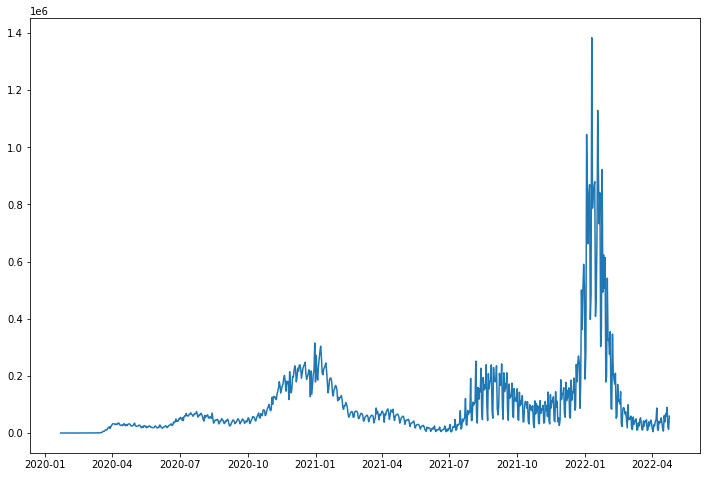

In [25]:
# idk if log is appropriate here
totalDailyCasesUS = totalCases_US.groupby(['Date']).agg({'daily_cases': 'sum'})
totalDailyCasesUS.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(12,8)) 

ax.plot(totalDailyCasesUS['Date'], totalDailyCasesUS['daily_cases'])

In [28]:
totalDailyCasesUS

,Date,daily_cases,log
0,2020-01-22,0.0,NaN
1,2020-01-23,0.0,NaN
2,2020-01-24,1.0,0.000000
3,2020-01-25,0.0,NaN
4,2020-01-26,3.0,0.477121
...,...,...,...
820,2022-04-21,59173.0,4.772124
821,2022-04-22,89658.0,4.952589
822,2022-04-23,19662.0,4.293628
823,2022-04-24,12984.0,4.113409


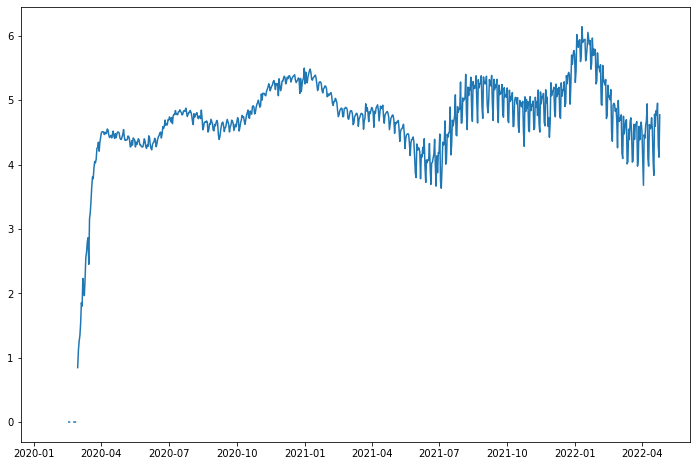

In [27]:
fig, ax = plt.subplots(figsize=(12,8)) 
totalDailyCasesUS['log'] = np.log10(totalDailyCasesUS['daily_cases'].replace(0, np.NaN))
np.log10(totalDailyCasesUS['daily_cases'].replace(0, np.nan))
ax.plot(totalDailyCasesUS['Date'], totalDailyCasesUS['log'])

In [82]:
type(ax)

<module 'seaborn' from '/home/rwaera/.local/lib/python3.8/site-packages/seaborn/__init__.py'>

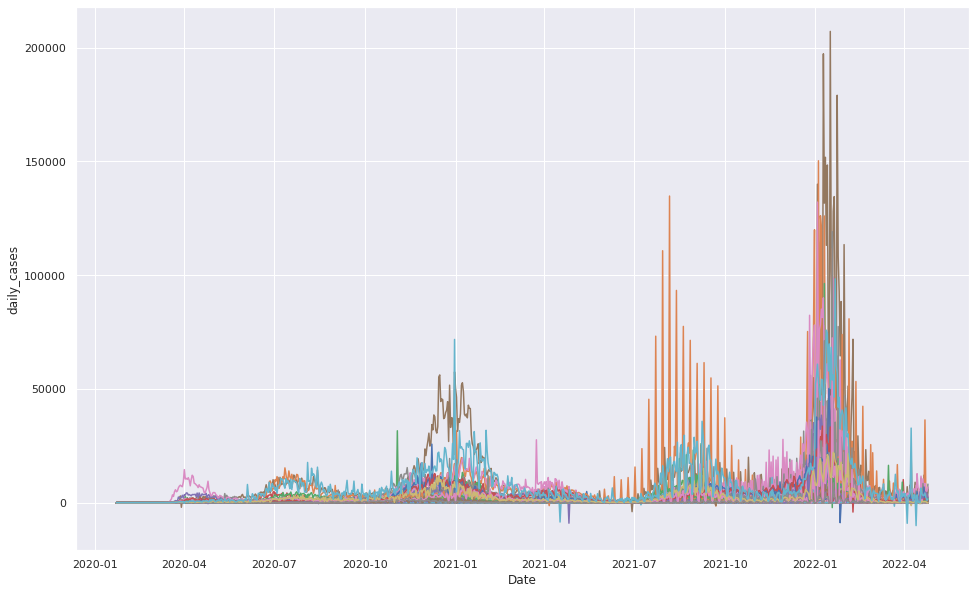

In [91]:
fig, ax = plt.subplots(figsize=(16,10))

for s in states[0:50]:
    state_filter = totalCases_US.loc[totalCases_US['Province_State'] == s]
    sns.lineplot(x="Date", y="daily_cases", data=state_filter)

An important thing here to note are the spikes in cases. These spikes typically are attributed to new COVID-19 variants popping up which have increased transmittivity...

One thing we would like to examine is whether the demographics of a county has an association with COVID cases. 

In [29]:
counties

,state,name,fips,age_over_18,age_over_18_moe,age_over_65,age_over_65_moe,age_over_85,age_over_85_moe,age_under_5,...,uninsured_under_19,uninsured_under_19_moe,uninsured_under_6,uninsured_under_6_moe,veterans,veterans_moe,white,white_moe,white_not_hispanic,white_not_hispanic_moe
0,Alabama,Autauga County,1001,76.2,0.1,15.0,0.2,1.6,0.3,5.8,...,1.7,0.9,1.7,2.3,12.6,1.3,76.8,0.5,74.6,0.1
1,Alabama,Baldwin County,1003,78.3,NaN,20.0,0.1,1.9,0.3,5.5,...,3.8,1.1,2.2,1.3,11.8,0.6,86.2,0.4,83.1,0.1
2,Alabama,Barbour County,1005,79.1,0.1,18.6,0.1,1.6,0.4,5.3,...,3.3,2.0,3.4,2.4,6.6,0.8,46.8,0.6,45.8,0.1
3,Alabama,Bibb County,1007,79.4,0.2,15.9,0.3,2.0,0.7,5.8,...,2.0,1.7,4.5,4.4,8.0,1.4,76.8,0.3,74.5,0.1
4,Alabama,Blount County,1009,76.8,0.1,17.9,0.2,1.8,0.3,5.9,...,5.9,2.5,6.1,3.2,7.7,0.8,95.5,0.6,86.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Wyoming,Sweetwater County,56037,73.5,NaN,11.4,0.2,1.1,0.4,6.9,...,9.2,2.4,13.8,5.2,8.6,0.8,93.4,0.7,79.6,0.1
3138,Wyoming,Teton County,56039,80.9,0.6,14.0,0.3,1.5,0.7,5.0,...,10.1,6.6,5.9,8.5,5.3,1.2,89.3,2.6,81.3,0.1
3139,Wyoming,Uinta County,56041,70.8,NaN,13.0,0.3,1.5,0.4,7.3,...,6.8,3.0,1.8,2.1,7.4,1.4,93.4,1.5,87.5,0.2
3140,Wyoming,Washakie County,56043,75.4,0.9,21.1,0.5,2.3,0.9,5.7,...,7.0,4.4,7.8,9.7,11.9,2.1,89.7,2.0,81.9,0.4


In [10]:
plt.show()

## Hypothesis Testing and Regression

### Part 1: $\Delta = 0?$

What we want to measure is the rate of transmitivvity of COVID during a period of time. It's unreasonable to look at the whole timeframe due to the fact that new variants are emerging and new vaccines are being administistered. 

In this section we want to hone in on one specific region of time more specifically when the Omnicron variant started rampaging in the states. According to 

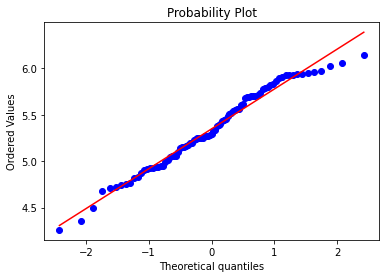

In [76]:
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import pylab as py

df = totalDailyCasesUS.query('20211201 < Date < 20220301')
# sm.qqplot(np.array[1,4,5,5,3,2,1,4], line ='45')
stats.probplot(df['log'], dist="norm", plot=py)
py.show()

## Communication of Insights

In [11]:
confirmed_Global = pd.read_csv("datasets/time_series_covid19_confirmed_Global.csv")
confirmed_Global

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178387,178418,178457,178513,178574,178611,178638,178648,178689,178745
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,274462,274504,274520,274535,274606,274606,274737,274791,274828,274828
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265739,265739,265741,265746,265746,265754,265761,265761,265767,265771
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,40709,40709,40709,40709,41013,41013,41013,41013,41013,41013
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,656617,656617,656617,656876,656876,656876,656876,656876,656876,656876
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11817,11817,11818,11818,11818,11818,11818,11818,11818,11818
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,318467,318515,318515,318640,318640,318984,318984,318984,318984,319316
